# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

In [353]:
import requests
import pandas as pd

def download(url, filename):
        r = requests.get(url)
        if (r.status_code == 404):
            raise NotFoundException("URL returned 404")
        else:
            with open(filename, 'wb') as f:
                f.write(r.content)
            
data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

download(data, 'cars.csv')



In [354]:
cars_raw = pd.read_csv('cars.csv', delimiter=",")

cars_df = pd.DataFrame(cars_raw)

print(cars_df.head(1))

   Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                140                143               202   

  Engine Information.Driveline        Engine Information.Engine Type  \
0              All-wheel drive  Audi 3.2L 6 cylinder 250hp 236ft-lbs   

   Engine Information.Hybrid  Engine Information.Number of Forward Gears  \
0                       True                                           6   

  Engine Information.Transmission  Fuel Information.City mpg  \
0  6 Speed Automatic Select Shift                         18   

  Fuel Information.Fuel Type  Fuel Information.Highway mpg  \
0                   Gasoline                            25   

  Identification.Classification Identification.ID Identification.Make  \
0        Automatic transmission  2009 Audi A3 3.2                Audi   

  Identification.Model Year  Identification.Year  \
0              2009 Audi A3                 2009   

   Engine Information.Engine Statistics.Horsepower  \
0                  

In [355]:
# variable = cars_df.loc[(cars_df["Identification.Make"] == 'Honda')]
# print(variable.shape)
# variable = cars_df.loc[(cars_df["Identification.Make"] == 'Honda') & (cars_df["Fuel Information.Fuel Type"] != 'Gasoline')]
# print(variable.shape)
cars_df = cars_df[(cars_df["Identification.Make"] == 'Honda') & (cars_df["Fuel Information.Fuel Type"] == 'Gasoline')]

print(cars_df.shape)

(198, 18)


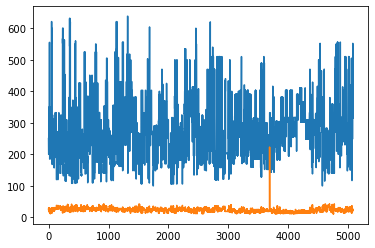

In [356]:
cars_raw['Engine Information.Engine Statistics.Horsepower'].plot()
cars_raw['Fuel Information.Highway mpg'].plot()

In [357]:
cars_df =  cars_df[(cars_df['Engine Information.Engine Statistics.Horsepower'] < cars_df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)) & (cars_df['Fuel Information.Highway mpg'] < cars_df['Fuel Information.Highway mpg'].quantile(0.90))]
print(cars_df)

      Dimensions.Height  Dimensions.Length  Dimensions.Width  \
102                 152                240                57   
103                 152                240                57   
104                 152                240                57   
106                 152                240                57   
107                 152                240                57   
...                 ...                ...               ...   
5067                  3                253               201   
5068                  3                253               201   
5069                  3                253               201   
5070                  3                253               201   
5071                 13                253               201   

     Engine Information.Driveline           Engine Information.Engine Type  \
102             Front-wheel drive  Honda 2.4L 4 cylinder 190 hp 162 ft-lbs   
103             Front-wheel drive  Honda 2.4L 4 cylinder 190 hp 162 ft-lbs 

In [358]:
cars_df_tf = cars_df[["Engine Information.Engine Statistics.Horsepower", "Fuel Information.Highway mpg"]]
print(cars_df_tf)

      Engine Information.Engine Statistics.Horsepower  \
102                                               190   
103                                               190   
104                                               190   
106                                               190   
107                                               190   
...                                               ...   
5067                                              250   
5068                                              250   
5069                                              250   
5070                                              250   
5071                                              250   

      Fuel Information.Highway mpg  
102                             31  
103                             31  
104                             31  
106                             31  
107                             31  
...                            ...  
5067                            25  
5068               

In [359]:
from sklearn import preprocessing
normalized = preprocessing.normalize(cars_df_tf)
normalized = pd.DataFrame(normalized)
print(normalized)
#min_max_scaler = preprocessing.MinMaxScaler()
#cars_df_normalized = pd.DataFrame(min_max_scaler.fit_transform(cars_df))
#cars_df_normalized = (cars_df-cars_df.min())/(cars_df.max()-cars_df.min())
# Will not use MinMaxScaler as it lost labels

            0         1
0    0.986950  0.161029
1    0.986950  0.161029
2    0.986950  0.161029
3    0.986950  0.161029
4    0.986950  0.161029
..        ...       ...
134  0.995037  0.099504
135  0.995424  0.095561
136  0.995037  0.099504
137  0.995424  0.095561
138  0.995037  0.099504

[139 rows x 2 columns]


In [360]:
import numpy as np
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt


xs = normalized[0]
ys = normalized[1]

xs = np.array(xs).reshape(-1, 1)

model = sklearn.linear_model.LinearRegression()
model.fit(xs, ys)
model.coef_

# The coefficient is the number in front of the x in our formula, which means the amount the function
# will either raise or fall with. In our case it will fall with -5.41 for each 1 unit on the x-axis

array([-5.41126123])

In [364]:
print(model.predict(np.array([1]).reshape(1,-1))) # Library function to calculate mathematical function and answer in that exact point

[0.08131972]


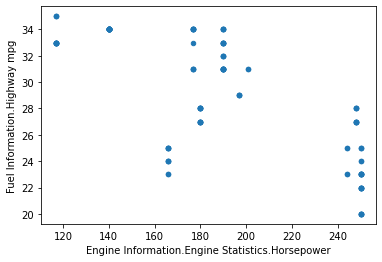

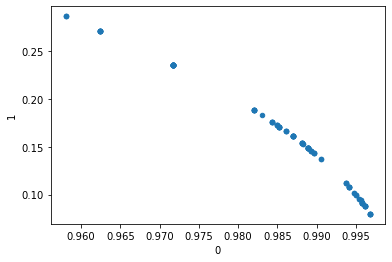

In [361]:
cars_df_tf.plot.scatter(x=0, y=1)
normalized.plot.scatter(x=0, y=1)

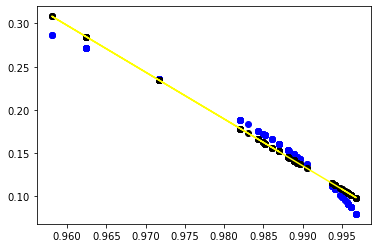

In [362]:
Ys = model.predict(xs)

plt.scatter(xs, ys, color="blue")
plt.scatter(xs, Ys, color="black")
plt.plot(xs, Ys, color='yellow')
plt.show()